In [1]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [2]:
!python -m wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv -o data.csv


Saved under data (6).csv


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
features = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']

In [7]:
df = df[features]

In [8]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [9]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [10]:
df = df.fillna(0)

In [11]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [12]:
df = df.rename(columns={'msrp':'price'})

Question 1

In [13]:
df.transmission_type.value_counts().idxmax()

'AUTOMATIC'

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


Question 2

In [15]:
df.corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


<AxesSubplot:>

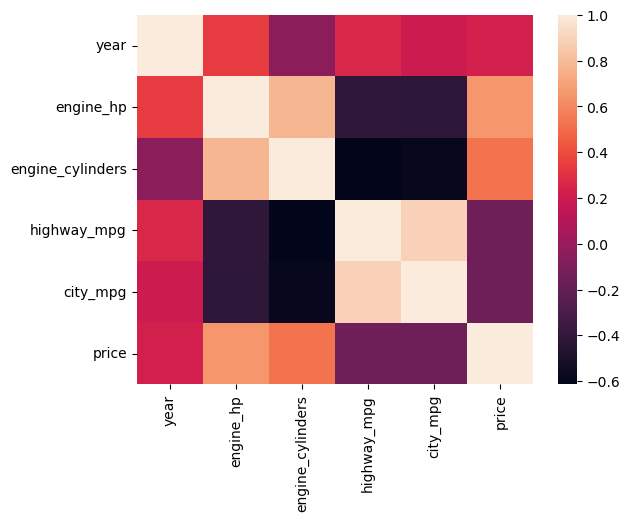

In [16]:
sns.heatmap(df.corr())

In [17]:
df['above_average'] = np.where(df.price > df.price.mean(), 1, 0)

In [18]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [19]:
df['above_average'].values

array([1, 1, 0, ..., 1, 1, 0])

In [20]:
y = df['above_average'].values
y_price = df['price'].values
y_price = np.log1p(y_price)
del df['above_average']
del df['price']

In [21]:
df_full_p, df_test_p, y_full_p, y_test_p = train_test_split(df, y_price, test_size=0.2, random_state=42)
df_train_p, df_val_p, y_train_p, y_val_p = train_test_split(df_full_p, y_full_p, test_size=0.25, random_state=42)

In [22]:
df_full, df_test, y_full, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
df_train, df_val, y_train, y_val = train_test_split(df_full, y_full, test_size=0.25, random_state=42)

Question 3

In [23]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)

In [24]:
categorical

['make', 'model', 'transmission_type', 'vehicle_style']

In [25]:
numerical = [x for x in list(df.columns) if x not in categorical]

In [26]:
numerical

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [27]:
for i in categorical:
    mut_info = mutual_info_score(df_train[i], y_train)
    print(i, round(mut_info, 2))

make 0.24
model 0.46
transmission_type 0.02
vehicle_style 0.08


Question 4

In [28]:
enc = OneHotEncoder(handle_unknown='ignore')

In [29]:
enc.fit(df_train[categorical])

OneHotEncoder(handle_unknown='ignore')

In [30]:
enc.categories_

[array(['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'BMW', 'Bentley',
        'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge',
        'FIAT', 'Ferrari', 'Ford', 'GMC', 'Genesis', 'HUMMER', 'Honda',
        'Hyundai', 'Infiniti', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
        'Lincoln', 'Lotus', 'Maserati', 'Maybach', 'Mazda', 'McLaren',
        'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth',
        'Pontiac', 'Porsche', 'Rolls-Royce', 'Saab', 'Scion', 'Spyker',
        'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'],
       dtype=object),
 array(['1 Series', '100', '124 Spider', '190-Class', '2', '2 Series',
        '200', '200SX', '240', '240SX', '3', '3 Series',
        '3 Series Gran Turismo', '300', '300-Class', '3000GT', '300M',
        '300ZX', '323', '350-Class', '350Z', '360', '370Z', '4 Series',
        '4 Series Gran Coupe', '400-Class', '420-Class', '456M',
        '458 Italia', '4C', '4Runner', '5', '5 Series',
  

In [31]:
df_train_transform = enc.transform(df_train[categorical]).toarray()
df_train_numerical = df_train[numerical].to_numpy()
X_train_enc = np.concatenate((df_train_transform, df_train_numerical), axis=1) 

In [32]:
X_train_enc.shape

(7148, 943)

In [33]:
model_enc = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [34]:
model_enc.fit(X_train_enc, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [35]:
df_val_transform = enc.transform(df_val[categorical]).toarray()
df_val_numerical = df_val[numerical].to_numpy()
X_val_enc = np.concatenate((df_val_transform, df_val_numerical), axis=1) 

In [36]:
model_enc.predict_proba(X_val_enc)

array([[9.99044957e-01, 9.55043438e-04],
       [3.70134688e-03, 9.96298653e-01],
       [9.99829493e-01, 1.70506711e-04],
       ...,
       [9.99708257e-01, 2.91743246e-04],
       [9.88864776e-03, 9.90111352e-01],
       [1.27041760e-02, 9.87295824e-01]])

In [37]:
y_pred_enc = model_enc.predict_proba(X_val_enc)[:, 1]

In [38]:
y_pred_enc

array([9.55043438e-04, 9.96298653e-01, 1.70506711e-04, ...,
       2.91743246e-04, 9.90111352e-01, 9.87295824e-01])

In [39]:
price_enc = y_pred_enc > 0.5

In [40]:
accuracy = round((y_val == price_enc).mean(), 2)

In [41]:
accuracy

0.94

Without onehotencoder

In [42]:
train_dict = df_train.to_dict(orient='records')

In [43]:
train_dict[0]

{'make': 'Mitsubishi',
 'model': 'Endeavor',
 'year': 2011,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'AUTOMATIC',
 'vehicle_style': '4dr SUV',
 'highway_mpg': 19,
 'city_mpg': 15}

In [44]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [45]:
X_train = dv.transform(train_dict)

In [46]:
X_train.shape

(7148, 943)

In [47]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [48]:
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [49]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [50]:
model.predict_proba(X_val)

array([[9.99692966e-01, 3.07033780e-04],
       [2.27974745e-03, 9.97720253e-01],
       [9.99930206e-01, 6.97938861e-05],
       ...,
       [9.99898957e-01, 1.01043039e-04],
       [8.98629570e-03, 9.91013704e-01],
       [9.08719100e-03, 9.90912809e-01]])

In [51]:
y_pred = model.predict_proba(X_val)[:, 1]

In [52]:
y_pred

array([3.07033780e-04, 9.97720253e-01, 6.97938861e-05, ...,
       1.01043039e-04, 9.91013704e-01, 9.90912809e-01])

In [53]:
price = y_pred > 0.5

In [54]:
round((y_val == price).mean(), 2)

0.95

Question 5

In [55]:
for column in list(df.columns):
    numerical_d = [x for x in numerical if column != x]
    categorical_d = [x for x in categorical if column != x]
    
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(df_train[categorical_d])
    
    df_train_transform = enc.transform(df_train[categorical_d]).toarray()
    df_train_numerical = df_train[numerical_d].to_numpy()
    X_train_enc = np.concatenate((df_train_transform, df_train_numerical), axis=1) 
    
    model_enc = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    
    model_enc.fit(X_train_enc, y_train)
    
    df_val_transform = enc.transform(df_val[categorical_d]).toarray()
    df_val_numerical = df_val[numerical_d].to_numpy()
    X_val_enc = np.concatenate((df_val_transform, df_val_numerical), axis=1) 
    
    y_pred_enc = model_enc.predict_proba(X_val_enc)[:, 1]
    
    price_enc = y_pred_enc > 0.5
    accuracy_drop = round((y_val == price_enc).mean(), 2)
    
    print(f'drop {column}, difference {accuracy - accuracy_drop}')

drop make, difference -0.010000000000000009
drop model, difference 0.019999999999999907
drop year, difference -0.010000000000000009
drop engine_hp, difference 0.019999999999999907
drop engine_cylinders, difference -0.010000000000000009
drop transmission_type, difference 0.0
drop vehicle_style, difference 0.009999999999999898
drop highway_mpg, difference 0.0
drop city_mpg, difference 0.0


Question 6

In [56]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_train_p[categorical])
df_train_transform_p = enc.transform(df_train_p[categorical]).toarray()
df_train_numerical_p = df_train_p[numerical].to_numpy()
X_train_enc_p = np.concatenate((df_train_transform_p, df_train_numerical_p), axis=1) 

In [57]:
df_val_transform_p = enc.transform(df_val_p[categorical]).toarray()
df_val_numerical_p = df_val_p[numerical].to_numpy()
X_val_enc_p = np.concatenate((df_val_transform_p, df_val_numerical_p), axis=1)

In [59]:
for i in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(solver='sag', random_state=42, alpha=i, max_iter=1000)
    model.fit(X_train_enc_p, y_train_p)
     
    
    y_pred_enc_p = model.predict(X_val_enc_p)
    
    #price_enc_p = y_pred_enc_p > 0.5
    #accuracy_p = round((y_val_p == price_enc_p).mean(), 2)
    print(round(mean_squared_error(y_val_p, y_pred_enc_p),3))

0.244
0.244
0.244
0.244
0.244
